<a href="https://colab.research.google.com/github/Sk-Ashif-Ahmmad732/AIML_Projects/blob/main/IDEAS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Monthly Revenue Analysis Started
Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...
 Data loaded successfully! Here are the first 5 rows:
   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  

Loaded 2000 transactions
Date range: 2023-01-01 to 2024-01-01

 Monthly Revenue Summary:
------------------------------
Total Revenue: 894,335.00
Average Monthly Revenue: 68,795.00
Highest Month: 

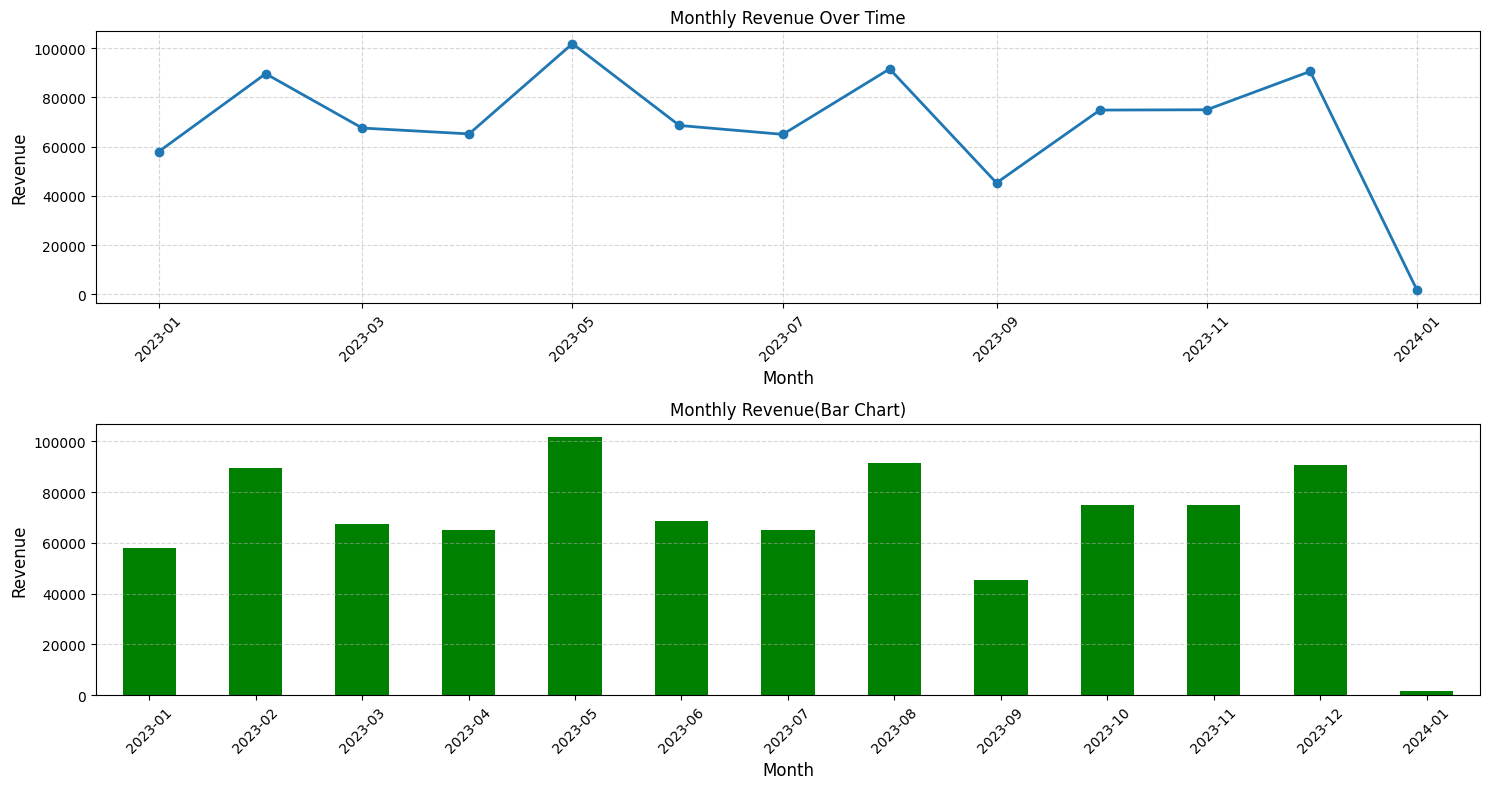

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# --- Load Data Function ---
def load_and_prepare_data(file_id=None, local_file=None):
    """
    Load transaction data from Google Drive (preferred) or local CSV file.
    """
    try:
        if file_id:
            url = f"https://drive.google.com/uc?export=download&id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"
            print(f"Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...")
            df = pd.read_csv(url)
        elif local_file:
            print(f"Loading data from local file: {local_file}")
            df = pd.read_csv(local_file)
        else:
            raise ValueError("Either file_id or local_file must be provided.")

        print(" Data loaded successfully! Here are the first 5 rows:")
        print(df.head())
        return df

    except Exception as e:
        print(f" Error loading data: {e}")
        return None


# --- Calculate Monthly Revenue ---
def calculate_monthly_revenue(df_sales):
    """Calculate monthly revenue from sales data."""
    # Ensure Date column exists and convert
    if 'Date' not in df_sales.columns:
        raise KeyError("The dataset must have a 'Date' column.")
    df_sales['Date'] = pd.to_datetime(df_sales['Date'])

    # Create Total Amount column (Quantity * Price per Unit)
    df_sales['Total Amount'] = df_sales['Quantity'] * df_sales['Price per Unit']

    # Group by Month-Year and sum revenue
    monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()
    monthly_revenue.index = monthly_revenue.index.to_timestamp()

    return monthly_revenue


# --- Analyze Revenue Trends ---
def analyze_revenue_trends(monthly_revenue):
    monthly_growth = monthly_revenue.pct_change() * 100
    stats = {
        'Total Revenue': monthly_revenue.sum(),
        'Average Monthly Revenue': monthly_revenue.mean(),
        'Highest Month': monthly_revenue.max(),
        'Lowest Month': monthly_revenue.min(),
        'Revenue Std Dev': monthly_revenue.std(),
        'Average Growth Rate': monthly_growth.mean()
    }
    return stats, monthly_growth


# --- Visualization ---
def visualize_monthly_revenue(monthly_revenue, monthly_growth):
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    plt.title('Monthly Revenue Over Time', fontsize=16, fontweight='bold')

    # 1. Monthly Revenue Trend

    axes[0].plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
    axes[0].set_title('Monthly Revenue Over Time')
    axes[0].set_xlabel('Month', fontsize=12)
    axes[0].set_ylabel('Revenue',fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, linestyle="--",alpha=0.5)

    # 2. Monthly Revenue Bar Chart
    monthly_revenue.plot(kind='bar', ax=axes[1], color='green')
    plt.title('Monthly Revenue(Bar Chart)')


    axes[1].set_xlabel('Month',fontsize=12)
    axes[1].set_ylabel('Revenue', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_xticklabels(monthly_revenue.index.strftime('%Y-%m'))
    axes[1].grid(axis='y', linestyle= "--",alpha=0.5)
    plt.tight_layout()
    plt.show()


# --- Main Execution ---
def main():
    print(" Monthly Revenue Analysis Started")
    print("=" * 60)


    file_id = "14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"
    df_sales = load_and_prepare_data(file_id=file_id)

    if df_sales is not None:
        print(f"\nLoaded {len(df_sales)} transactions")
        print(f"Date range: {df_sales['Date'].min()} to {df_sales['Date'].max()}")

        monthly_revenue = calculate_monthly_revenue(df_sales)
        stats, monthly_growth = analyze_revenue_trends(monthly_revenue)

        print("\n Monthly Revenue Summary:")
        print("-" * 30)
        for metric, value in stats.items():
            if "Revenue" in metric or "Month" in metric:
                print(f"{metric}: {value:,.2f}")
            else:
                print(f"{metric}: {value:.2f}%")

        visualize_monthly_revenue(monthly_revenue, monthly_growth)
    else:
        print(" Data loading failed. Please check file ID or file format.")


# Run script
if __name__ == "__main__":
    main()


 Starting Sales Data Analysis...
Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...
Data loaded successfully! Here are the first 5 rows:
   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  

Dataset shape: (2000, 7)
Columns: ['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


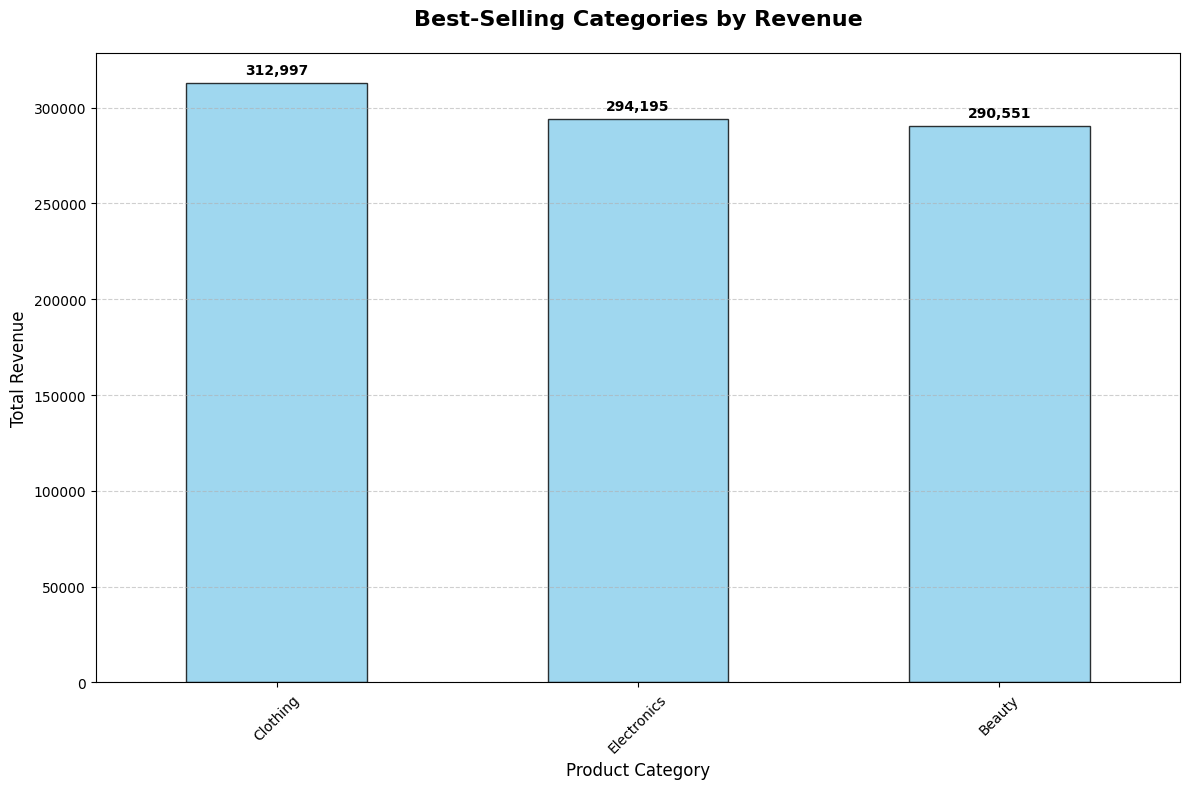

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# --- Load Data Function ---
def load_and_prepare_data(file_id=None, local_file=None):
    """
    Load transaction data from Google Drive (preferred) or local CSV file.
    """
    try:
        if file_id:
            url = f"https://drive.google.com/uc?export=download&id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"
            print(f"Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...")
            df = pd.read_csv(url)
        elif local_file:
            print(f"Loading data from local file: {local_file}")
            df = pd.read_csv(local_file)
        else:
            raise ValueError("Either file_id or local_file must be provided.")

        print("Data loaded successfully! Here are the first 5 rows:")
        print(df.head())
        print(f"\nDataset shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# --- Sales Analysis Function ---
def analyze_best_selling_categories(df, category_col='Product Category', revenue_col='Total Amount'):
    """
    Analyze and visualize best-selling categories by revenue.

    Parameters:
    df: DataFrame with sales data
    category_col: Column name for product categories
    revenue_col: Column name for revenue/total amount
    """


       # Group by Product Category and sum the revenue
    category_revenue = df.groupby(category_col)[revenue_col].sum().sort_values(ascending=False)



    # Create visualization
    plt.figure(figsize=(12, 8))
    # Plot bar chart
    ax = category_revenue.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

    plt.title("Best-Selling Categories by Revenue", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Product Category", fontsize=12)
    plt.ylabel("Total Revenue", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle="--", alpha=0.6)

    # Add value labels on bars
    for i, v in enumerate(category_revenue.values):
     ax.text(i, v + max(category_revenue.values) * 0.01, f'{v:,.0f}',
            ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return category_revenue


# --- Main Execution ---
def main():
    """
    Main function to execute the complete sales analysis workflow.
    """
    print(" Starting Sales Data Analysis...")

    # Load data
    file_id = "14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"  # Google Drive file ID


    # Load the data
    df_sales = load_and_prepare_data(file_id=file_id)

    if df_sales is not None:


        # Perform analysis
        category_revenue = analyze_best_selling_categories(
            df_sales,
            category_col='Product Category',
            revenue_col='Total Amount'
        )


    else:
        print("Failed to load data. Please check your file path or Google Drive permissions.")


if __name__ == "__main__":
    main()


 Starting Comprehensive Sales Data Analysis...
Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...
Data loaded successfully! Here are the first 5 rows:
   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  

Dataset shape: (2000, 7)
Columns: ['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

 Creating Donut Chart...


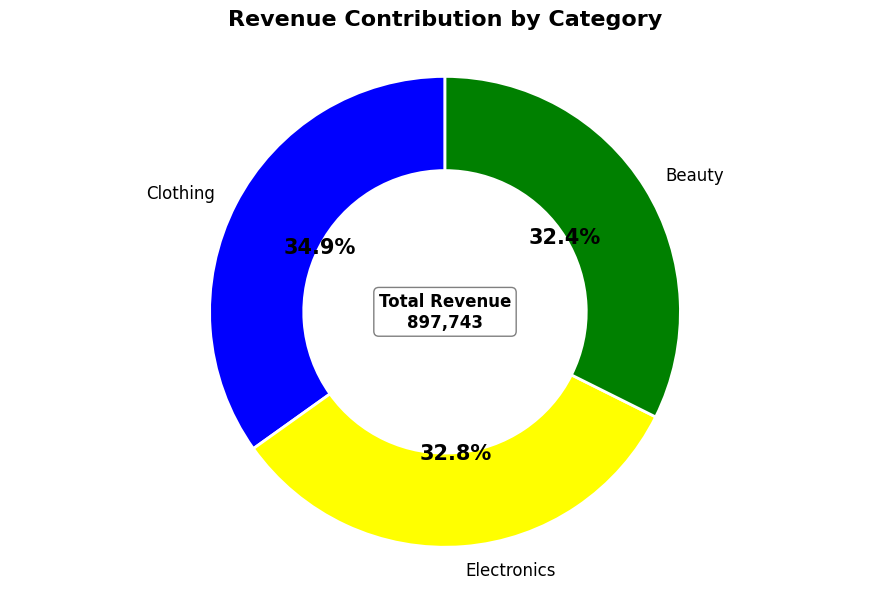

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# --- Load Data Function ---
def load_and_prepare_data(file_id=None, local_file=None):
    """
    Load transaction data from Google Drive (preferred) or local CSV file.
    """
    try:
        if file_id:
            url = f"https://drive.google.com/uc?export=download&id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"
            print(f"Loading data from Google Drive (file_id=14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL)...")
            df = pd.read_csv(url)
        elif local_file:
            print(f"Loading data from local file: {local_file}")
            df = pd.read_csv(local_file)
        else:
            raise ValueError("Either file_id or local_file must be provided.")

        print("Data loaded successfully! Here are the first 5 rows:")
        print(df.head())
        print(f"\nDataset shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        return None


# --- Create Donut Chart Function ---
def create_donut_chart(category_revenue, title="Revenue Contribution by Category"):
    """
    Create a donut chart visualization for category revenue distribution.
    """
    # Create color palette
    color_map = {
        'Clothing': 'blue',
        'Beauty': 'green',
        'Electronics': 'yellow'
    }

    # Generate the list of colors for the chart based on the category order
    colors = [color_map.get(category, 'gray') for category in category_revenue.index]
    plt.figure(figsize=(9, 6))

    # Create donut chart
    wedges, texts, autotexts = plt.pie(
        category_revenue,
        labels=category_revenue.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=2)
    )

    # Formatting
    plt.setp(autotexts, size=15, weight="bold", color="black")
    plt.setp(texts, size=12)

    # Add title
    plt.title(title, fontsize=16, fontweight='bold', pad=20)

    # Add center text with total revenue
    total_revenue = category_revenue.sum()
    plt.text(0, 0, f'Total Revenue\n{total_revenue:,.0f}',
             ha='center', va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"))

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# --- Sales Analysis Function ---
def analyze_category_revenue(df, category_col='Product Category', revenue_col='Total Amount',
                            show_donut=True):
    """
    Analyze and visualize category revenue with multiple chart types.

    Parameters:
    df: DataFrame with sales data
    category_col: Column name for product categories
    revenue_col: Column name for revenue/total amount
    show_donut: Whether to show donut chart
    """


    # Group by Product Category and sum the revenue
    category_revenue = df.groupby(category_col)[revenue_col].sum().sort_values(ascending=False)


  # Create visualizations


    if show_donut:
            print(f"\n Creating Donut Chart...")
            create_donut_chart(category_revenue)

    return category_revenue



# --- Additional Analytics Function ---
def generate_summary_stats(category_revenue):
    """
    Generate summary statistics for category revenue.
    """
    if category_revenue is None or category_revenue.empty:
        print(" No data available for summary statistics.")
        return




# --- Main Execution ---
def main():
    """
    Main function to execute the complete sales analysis workflow.
    """
    print(" Starting Comprehensive Sales Data Analysis...")
    print("=" * 60)

    # Load data
    file_id = "14kLysf0d3Rh9V_1IWk9HCZNj0SXdNfmL"  # Google Drive file ID


    # Load the data
    df_sales = load_and_prepare_data(file_id=file_id)

    if df_sales is not None:


        # Perform analysis with both visualizations
        category_revenue = analyze_category_revenue(
            df_sales,
           show_donut=True
        )



    else:
        print(" Failed to load data. Please check your file path or Google Drive permissions.")


if __name__ == "__main__":
    main()
